# Experiment 4

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("outputs/exp4_cores_1024_5/data.csv")
# df = pd.read_csv("outputs/exp4_cores_1024_500/data.csv")
df.keys()

Index(['i_sample', 'n_cores', 'step', 'method', 'execution_time'], dtype='object')

In [7]:
df

,i_sample,n_cores,step,method,execution_time
0,1,2,1,1,80.390894
1,1,2,1,2,39.703291
2,1,2,1,3,39.813354
3,1,2,2,1,1.100743
4,1,2,2,2,2.070339
...,...,...,...,...,...
205,5,24,1,2,4.789140
206,5,24,1,3,4.768669
207,5,24,2,1,1.003681
208,5,24,2,2,18.100467


## General Statistics

### Statistics

In [8]:
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')
table

n_cores             2          4          8          12         16         20  \
step method                                                                     
1    1       82.141447  73.763226  68.700362  75.799297  92.874763  74.632302   
     2       41.865079  17.961555   9.117695   7.252354   8.049711   6.710323   
     3       41.495453  17.821881   8.667192   7.397263   7.876885   6.308710   
2    1        1.189218   1.190102   1.005164   0.993321   1.028424   0.996328   
     2        2.610364   4.613299   5.209079   8.535742  16.018892  15.935516   
     3        2.722369   4.830712   5.682662   8.883140  16.297947  16.059553   

n_cores             24  
step method             
1    1       86.670466  
     2        7.175631  
     3        7.283570  
2    1        0.999526  
     2       21.085039  
     3       21.784458

In [9]:
import pandas as pd

# Calcular tiempos medios de ejecución agrupados por step, method
mean_times = df.groupby(['step', 'method','n_cores'])['execution_time'].mean().reset_index()

# Ordenar y pivotar la tabla
mean_times = mean_times.sort_values(by=['step', 'method','n_cores'])
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')

# Convertir el índice en columnas y renombrar
table_reset = table.reset_index().rename(columns={'step': 'Stage', 'method': 'Method'})

# Lista de columnas
cols = table_reset.columns.tolist()
n_bool_cols = len(cols) - 2

# Definir formato de columnas para LaTeX
col_format = "c|l|" + "r|" * n_bool_cols
col_format = col_format.rstrip("|")

latex_str = "\\begin{tabular}{" + col_format + "}\n\\hline\n"
latex_str += " &  & \\multicolumn{" + str(n_bool_cols) + "}{c}{\\textbf{\\# of Cores}} \\\\ \\hline\n"
latex_str += "{\\bf Stage} & {\\bf Method} " + " & ".join([f"{{\\bf {col}}}" for col in cols[2:]]) + " \\\\ \\hline\n"

# Agrupar por Stage para combinar las celdas de esa columna
grouped = table_reset.groupby("Stage")
for stage, group in grouped:
    n_rows = group.shape[0]
    first = True
    for _, row in group.iterrows():
        stage_cell = f"\\multirow{{{n_rows}}}{{*}}{{Step {int(stage)}}}" if first else ""
        first = False
        row_line = f"{stage_cell} & {row['Method']}"

        # Recorrer columnas de redes locales
        for col in cols[2:]:
            val = row[col]
            cell = f"{val:.4f}s" if not pd.isna(val) else "--"
            row_line += " & " + cell

        row_line += " \\\\"
        latex_str += row_line + "\n"

    latex_str += "\\hline\n"

latex_str += "\\end{tabular}"

print(latex_str)


\begin{tabular}{c|l|r|r|r|r|r|r|r}
\hline
 &  & \multicolumn{7}{c}{\textbf{\# of Cores}} \\ \hline
{\bf Stage} & {\bf Method} {\bf 2} & {\bf 4} & {\bf 8} & {\bf 12} & {\bf 16} & {\bf 20} & {\bf 24} \\ \hline
\multirow{3}{*}{Step 1} & 1.0 & 82.1414s & 73.7632s & 68.7004s & 75.7993s & 92.8748s & 74.6323s & 86.6705s \\
 & 2.0 & 41.8651s & 17.9616s & 9.1177s & 7.2524s & 8.0497s & 6.7103s & 7.1756s \\
 & 3.0 & 41.4955s & 17.8219s & 8.6672s & 7.3973s & 7.8769s & 6.3087s & 7.2836s \\
\hline
\multirow{3}{*}{Step 2} & 1.0 & 1.1892s & 1.1901s & 1.0052s & 0.9933s & 1.0284s & 0.9963s & 0.9995s \\
 & 2.0 & 2.6104s & 4.6133s & 5.2091s & 8.5357s & 16.0189s & 15.9355s & 21.0850s \\
 & 3.0 & 2.7224s & 4.8307s & 5.6827s & 8.8831s & 16.2979s & 16.0596s & 21.7845s \\
\hline
\end{tabular}


### Boxplots and Violin Plots

In [10]:
# Unique values for steps and methods
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_local_networks_values = sorted(df['n_local_networks'].unique())

# Plot boxplots and violin plots
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_local_networks_values))  # X positions
    width = 0.2  # Width of each box/violin

    # Boxplots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna() for n in n_local_networks_values]
        ax.boxplot(data, positions=positions + i * width - width, widths=width, patch_artist=True,
                   boxprops=dict(facecolor=f"C{i}"), medianprops=dict(color='black'))

    # Violin plots
    for i, method in enumerate(methods):
        data = [df[(df['step'] == step) & (df['method'] == method) & (df['n_local_networks'] == n)]
                ['execution_time'].dropna().values for n in n_local_networks_values]
        parts = ax.violinplot(data, positions=positions + i * width - width, widths=width, showmeans=False,
                              showextrema=False, showmedians=False)
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_local_networks_values)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend([plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))], methods, title="Method")

    # Para el paso 3, usar escala logarítmica en el eje y
    if step == 2:
        ax.set_yscale('log')

    plt.show()


KeyError: 'n_local_networks'

### Histograms

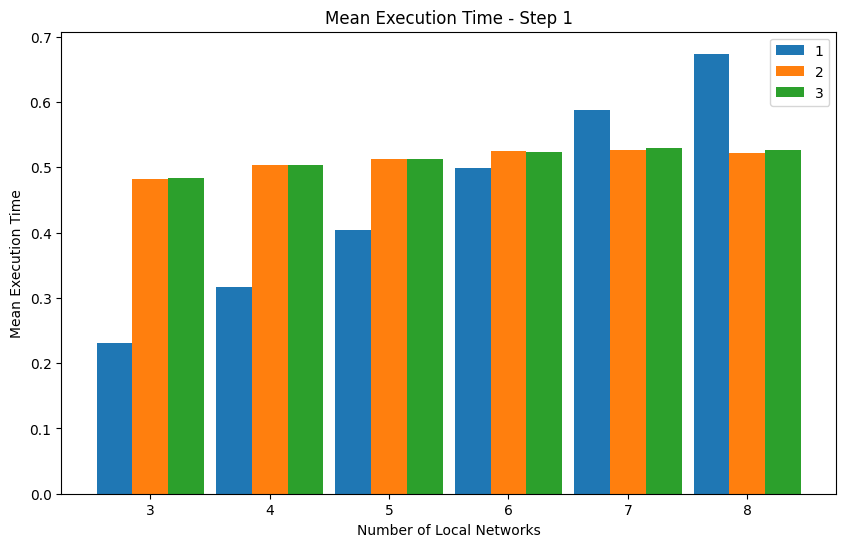

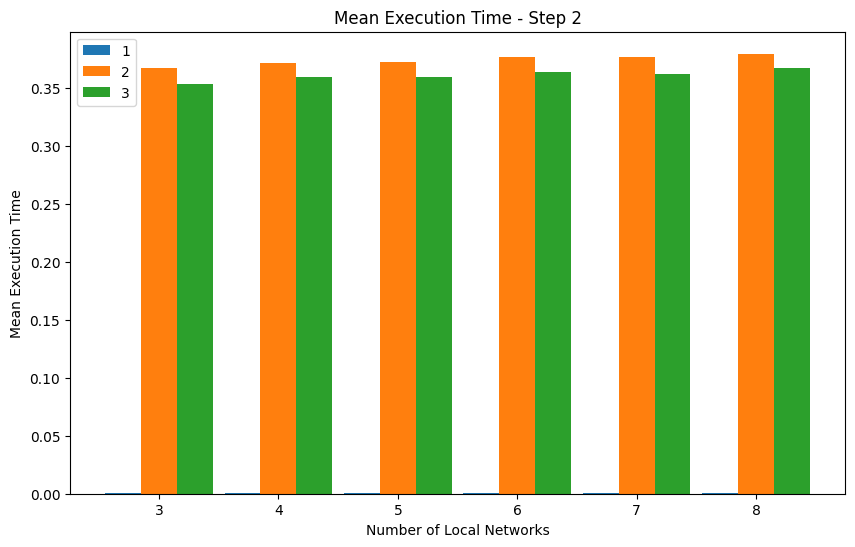

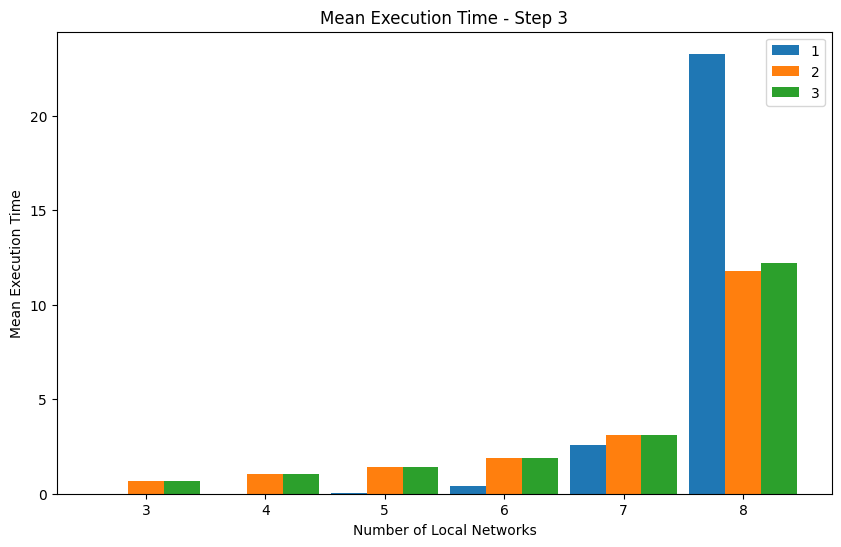

In [12]:
# Create boxplots and violin plots for execution times grouped by step and method
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_local_networks = sorted(df['n_local_networks'].unique())

# Create histograms for mean execution times per step
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Width of each bar
    positions = np.arange(len(unique_n_local_networks))

    for i, method in enumerate(unique_methods):
        means = [data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)]['execution_time'].values[0] if not data_step[(data_step['n_local_networks'] == n) & (data_step['method'] == method)].empty else 0 for n in unique_n_local_networks]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_local_networks)
    ax.set_xlabel("Number of Local Networks")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()
